In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# only get Data Analyst jon in US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values of Salary_year_avg
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [4]:
df_DA_US = df_DA_US.explode('job_skills')

In [5]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)


In [ ]:
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)


,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


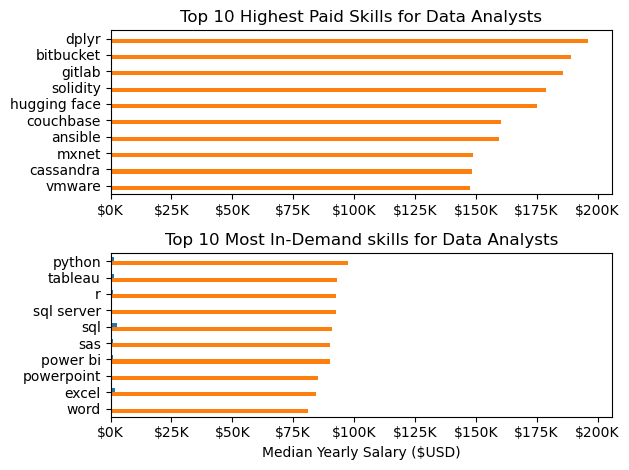

In [12]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay.plot(kind='barh', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most In-Demand skills for Data Analysts')
ax[1].set_xlabel('Median Yearly Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
